# MTH 4224 / CSE 4224 - Homework 2

**Deadline**: Feb 18, 2024

**Points**: 40

**Note**: I did give some hints, but I did not teach about every built-in function you're going to need to use. This will *always* be the situation in real life. Be resourceful, read the documentation, Google your errors.

**Academic Honesty**: Write your code from scratch. Learn from the Internet, talk to classmates or friends, ask me questions, but don't just copy blocks of code. Every submission we grade should be unique.

### Instructions

Submit **one** Python notebook file for grading. Your file must include **mathematical work** (type it or insert pictures of your handwritten work), **text explanations** of your work, **well-commented code**, and the **outputs** from your code.

### Problems

1. A common type of linear basis expansion is cubic splines. (See pages 141-146 in _Elements of Statistical Learning_.) Parts of this problem use the [Italian Air Quality Dataset](https://archive.ics.uci.edu/dataset/360/air+quality), which has hourly data from 3/10/2004 to 4/4/2005 on numerous measures of air pollution.

    a. **[5 points]** _Elements of Statistical Learning_ exercise 5.1
        
    b. **[5 points]** Load the Italian Air Quality Dataset into Python. Remove any columns with more than 10\% missing data (-200 = missing). Convert it into a dataset of non-overlapping time-series corresponding to 24 hours of readings.
    
    c. **[5 points]** Suppose there's a new sensor that makes the same readings but can only make readings 4 times per day. The new sensor is much cheaper, so we are interested in whether we can use the new sensors and use a cubic spline model to fill in the readings for PT08.S1 (CO) in the remaining hours using cubic splines with 4 knots placed at whatever daily times you choose.
    
[**_Hint._** The 4 readings used at the knot times are the inputs while the remaining 20 hours are the outputs.]

2. The file `data/aneurysm.npy` contains $(x, y, z)$ coordinates for a sparse point cloud of points on the boundy of the geometry of a blood vessel with an aneurysm. For this problem, you will analyze the data and attempt to build a model of the 2D boundary of the shape.

    a. **[5 points]** Read the data into Python and make a plot of the 3D points.
    
    b. **[10 points]** Assume the geometry is made up of a 2D curve rotated about a suitable axis to create a shape that is circular on each slice perpendicular to the tube. Fit the best curve you can and plot the corresponding 3D surface.
    
    c. **[10 points]** Fit a radial basis function expansion model to learn the surface using gradient descent for optimization. Plot the surface.
    
    d. **[Bonus +5 points]** Implement a roughness penalty in your loss function.

[**_Hint._** Use only the top half of the point cloud, fit the model, plot it for a regular grid of x and y coordinates, and then mirror it.]

a. **[5 points]** _Elements of Statistical Learning_ exercise 5.1

Ex. 5.1 Show that the trunated power basis function in (5.3) represent a basis for a cubic spline with the two knots as indicated.

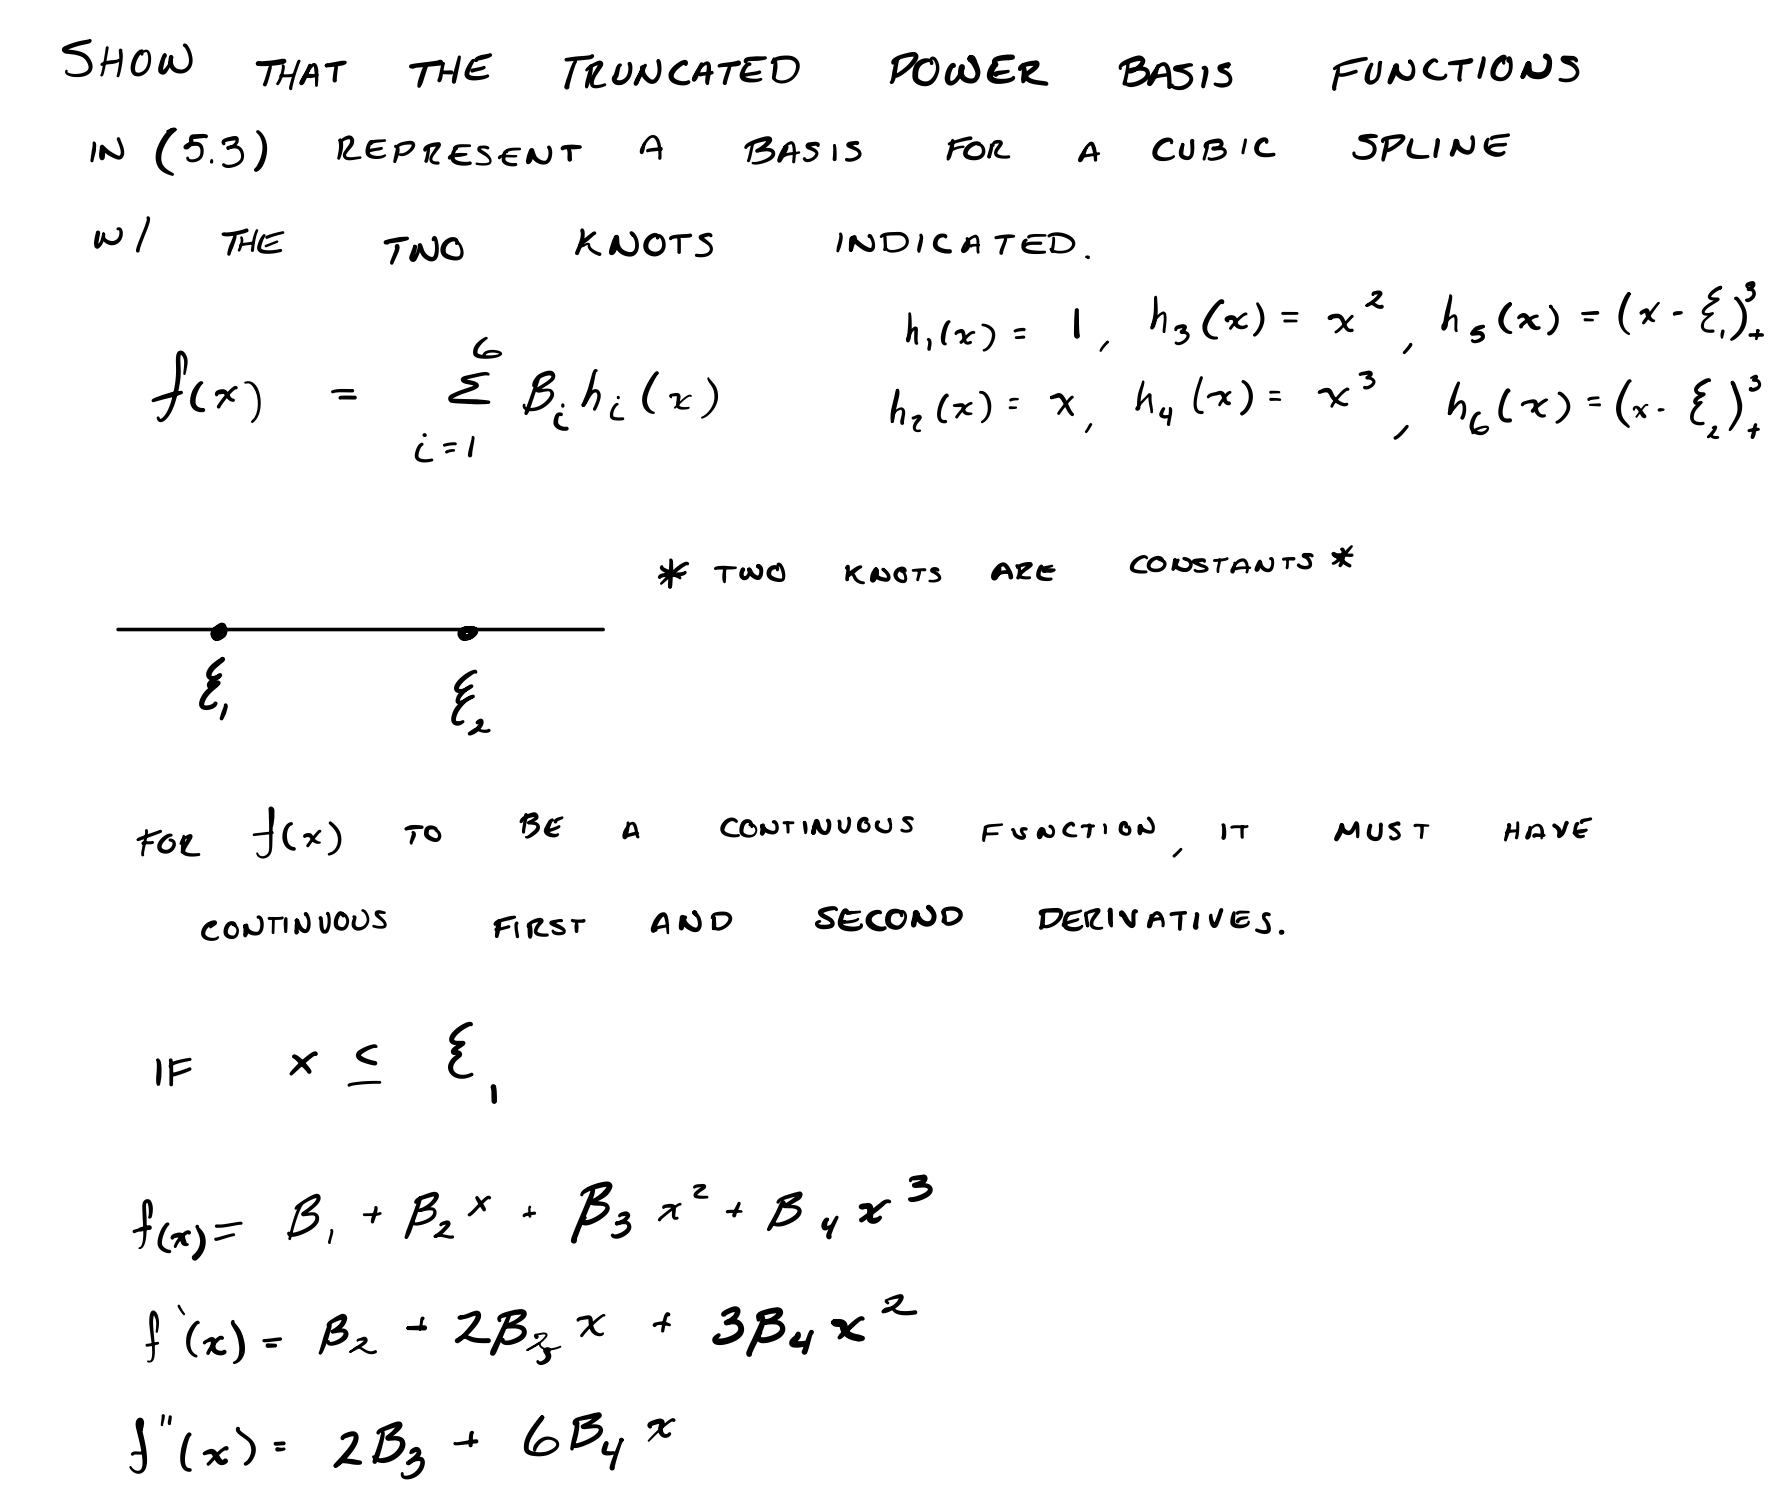
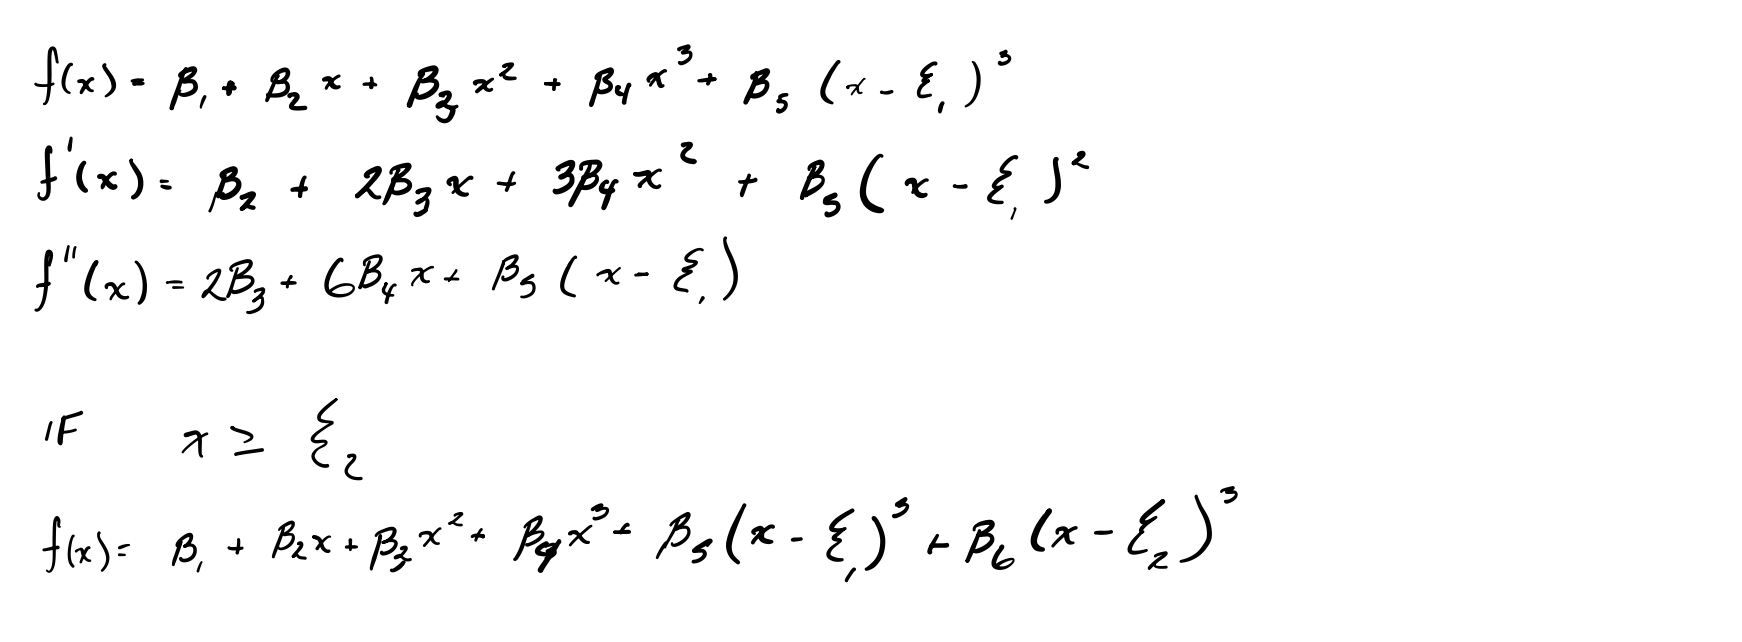
![image-3.png](attachment:image-3.png)


b. **[5 points]** Load the Italian Air Quality Dataset into Python. Remove any columns with more than 10\% missing data (-200 = missing). Convert it into a dataset of non-overlapping time-series corresponding to 24 hours of readings.

In [74]:
'''

This cell is used to import the data from an excel file and store the data in a Pandas dataframe.
Once data is in a pandas dataframe the data is cleaned to make all cells contain a numeric value
rather than a string. Once all data prepation has been completed the data is split into train,
test, and validate sets.

'''

import pandas as pd
from sklearn.model_selection import train_test_split

path_to_file = "/Users/spencerhirsch/Documents/GitHub/senior/mlwhite/hw/hw2/AirQualityUCI.xlsx"
data = pd.read_excel(path_to_file)      # Take in file as excel file.


'''
    Find columns that exceed the 10% threshold of mission values.

    Find percentage of column consisting of value, find index of columns, drop
    from table.
'''
percentages = (data == -200).sum() / len(data)
remove = percentages[percentages > 0.1].index
print(remove)
data = data.drop(remove, axis=1)

data

Index(['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'], dtype='object')


,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.00,11.881723,1045.50,1056.25,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,1292.25,9.397165,954.75,1173.75,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,1402.00,8.997817,939.25,1140.00,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,1375.50,9.228796,948.25,1092.00,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1272.25,6.518224,835.50,1205.00,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,1314.25,13.529605,1101.25,538.50,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,1162.50,11.355157,1027.00,603.75,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,1142.00,12.374538,1062.50,603.25,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,1002.50,9.547187,960.50,701.50,1041.00,769.75,28.325,13.550000,0.513866


c. **[5 points]** Suppose there's a new sensor that makes the same readings but can only make readings 4 times per day. The new sensor is much cheaper, so we are interested in whether we can use the new sensors and use a cubic spline model to fill in the readings for PT08.S1 (CO) in the remaining hours using cubic splines with 4 knots placed at whatever daily times you choose.

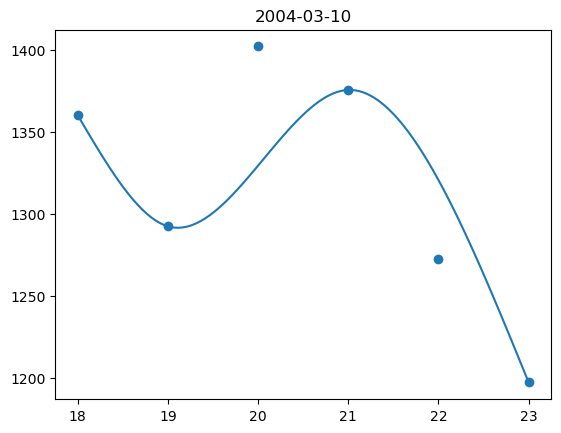

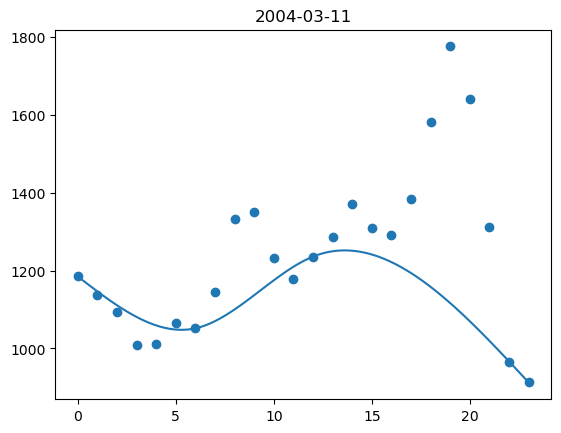

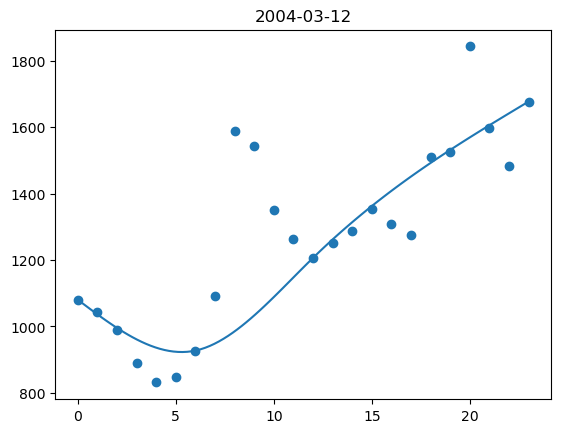

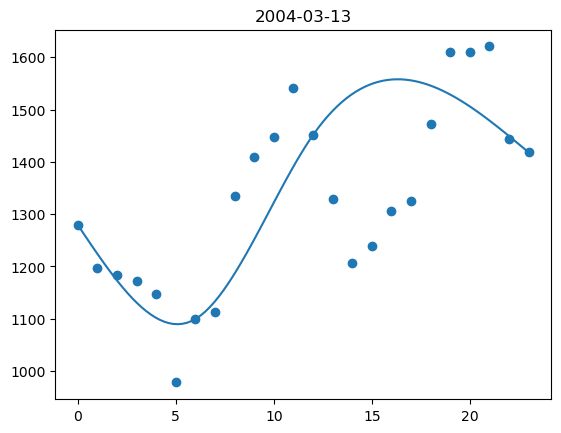

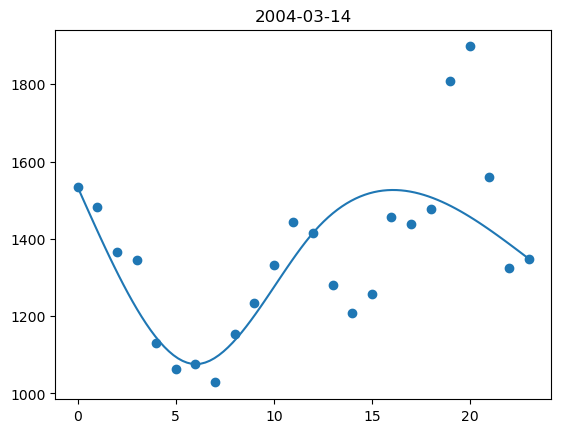

In [75]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Break data into individual dataframes based on date.
dates = data.groupby(pd.Grouper(key='Date'))

# Loop through and plot the first 5 days
count = 0
for date, group in dates: 
    if count < 5:
        X = group['Time']
        X = X.to_numpy().astype(str)
        y = group['PT08.S1(CO)']
        y = y.to_numpy().astype(float)

        x = []
        for val in X:
            val = val.split(':')[0]
            x.append(val)


        # Find the 4 data points to use to create the Cubic Spline.
        x = np.array(x).astype(int)
        x_vals = np.array([x[0], x[int(len(group) / 4)], x[int(len(group) / 2)], x[len(group) - 1]])
        y_vals = np.array([y[0], y[int(len(group) / 4)], y[int(len(group) / 2)], y[len(group) - 1]])

        # Find cubic spline
        cs = CubicSpline(x_vals, y_vals, axis=0, bc_type='natural', extrapolate=None)
        
        # Plot the Spline
        xs = np.linspace(x[0], x[len(x) - 1], 100)
        plt.plot(xs, cs(xs))
        
        # Plot the true data points
        plt.scatter(x, y)
        plt.title(str(date).split(' ')[0])
        plt.show()
        count += 1
    else:       # Used to print the first 5 charts
        break


2. The file `data/aneurysm.npy` contains $(x, y, z)$ coordinates for a sparse point cloud of points on the boundy of the geometry of a blood vessel with an aneurysm. For this problem, you will analyze the data and attempt to build a model of the 2D boundary of the shape.

a. **[5 points]** Read the data into Python and make a plot of the 3D points.

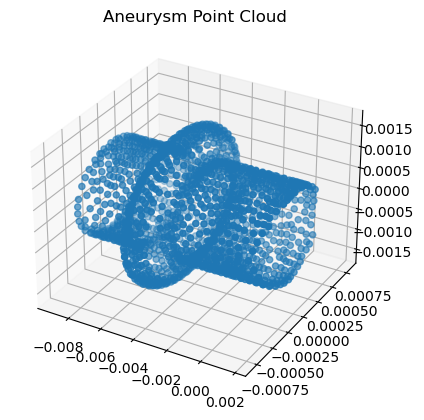

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read in data
data = np.load('aneurysm.npy')

# Plot 3d scatter plot represnting data
x, y, z = data[0], data[1], data[2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

plt.title("Aneurysm Point Cloud")
plt.show()



b. **[10 points]** Assume the geometry is made up of a 2D curve rotated about a suitable axis to create a shape that is circular on each slice perpendicular to the tube. Fit the best curve you can and plot the corresponding 3D surface.


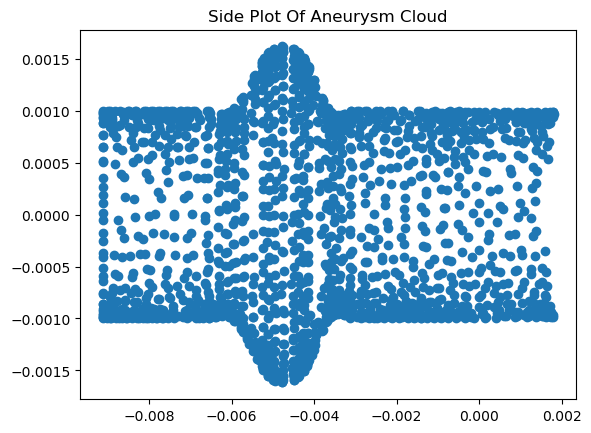

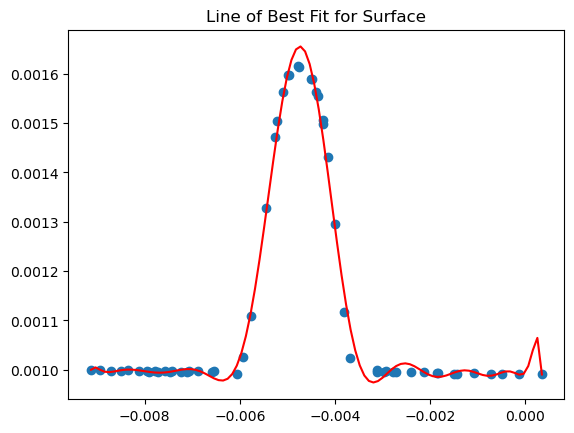

In [99]:
# Plot 2d data
fig = plt.figure()
plt.scatter(x, z)
plt.title("Side Plot Of Aneurysm Cloud")
plt.show()

# Clean and process data to find best points to generate line of best fit
indices_x, indices_z = [], []
for count in range(len(data[2])):
    if data[2][count] > 0.00099 and data[0][count] not in indices_x and data[1][count] < 0.00005 and data[1][count] > -.00005:
        indices_x.append(data[0][count])
        indices_z.append(data[2][count])

# Find coefficients for line of best fit.
coefficients = np.polyfit(indices_x, indices_z, 18)

# Generating polynomial line values
poly_line = np.poly1d(coefficients)
x_range = np.linspace(min(indices_x), max(indices_x), 100)
y_range = poly_line(x_range)

# Plot line of best fit
x_plot = np.linspace(1, 5, 100)
y_plot = np.polyval(coefficients, x_plot)
plt.plot(x_range, y_range, color='red', label='Polynomial Line of Best Fit')
plt.scatter(indices_x, indices_z, label='Polynomial Fit')
plt.title("Line of Best Fit for Surface")
plt.show()



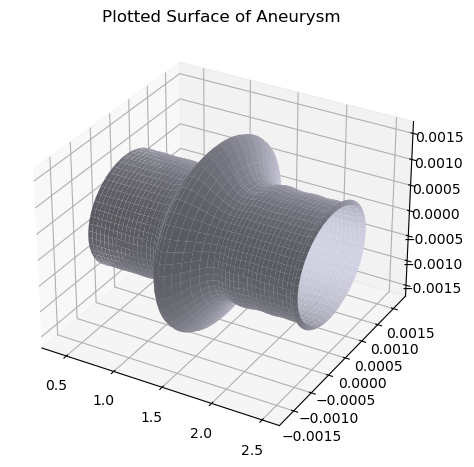

In [102]:
# Plot surface of based on previously calculated line of best fit.

fig = plt.figure(figsize=(12,6))
ax2 = fig.add_subplot(122,projection='3d')
y = np.linspace(np.pi/8, np.pi*4/5, 100)
x = np.sin(y_range)
t = np.linspace(0, np.pi*2, 100)

zn = np.outer(x, np.cos(t))
yn = np.outer(x, np.sin(t))
xn = np.zeros_like(zn)

for i in range(len(x)):
    xn[i:i+1,:] = np.full_like(xn[0,:], y[i])
    
ax2.plot_surface(xn, yn, zn, color="lavender")
plt.title("Plotted Surface of Aneurysm")
plt.show()

c. **[10 points]** Fit a radial basis function expansion model to learn the surface using gradient descent for optimization. Plot the surface.

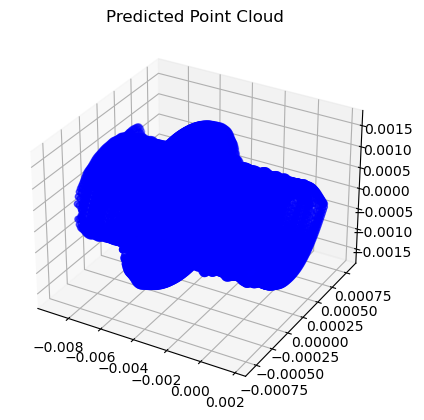

In [103]:
from scipy.interpolate import Rbf

x = data[0]
y = data[1]
true_z = data[2]

# Process and break up true data
indices = []
for index in range(len(true_z)):
    if true_z[index] > 0:
        indices.append(index)

new_x, new_y, new_z = [], [], []
for val in indices:
    new_x.append(x[val])
    new_y.append(y[val])
    new_z.append(z[val])

# Create rbf model
rbf_model = Rbf(new_x, new_y, new_z)

xi = np.linspace(min(new_x), max(new_x), 100)
yi = np.linspace(min(new_y), max(new_y), 100)

# predict z values
X, Y = np.meshgrid(xi, yi)
predicted_z = rbf_model(X, Y)
predicted_z[predicted_z < 0 ] = None

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot both positive and negative z values
ax.scatter(X.ravel(), Y.ravel(), predicted_z.ravel(), color='blue')
ax.scatter(X.ravel(), Y.ravel(), -predicted_z.ravel(), color='blue')
plt.title("Predicted Point Cloud")

plt.show()